In [14]:
import matplotlib.pyplot as plt
import random
import matplotlib
import numpy as np

In [15]:
def metryka_euk(a, b):
    return np.sqrt(((a[0] - b[0]) ** 2) + ((a[1] - b[1]) ** 2))

In [16]:
def srodek(values):
    x, y = 0, 0
    for val in values:
        x += val[0]
        y += val[1]
    return [x / len(values), y / len(values)]

In [17]:
def licz_odleglosci(probki, srodki, slownik):
    for pr in probki:
        grupy = []
        for index in range(len(slownik)):
            grupy.append(metryka_euk(pr, srodki[index]))
        index_min = grupy.index(min(grupy))
        tmp = 'gr' + str(index_min + 1)
        slownik[tmp].append(pr)
    return slownik

In [18]:
def probki_str_na_liczby(probki_str, numery_atr):
    new = []
    for val in probki_str:
        if len(val.values) == 2:
            tmp = []
            for index in numery_atr:
                try:
                    number = float(val.values[index])
                    tmp.append(number)
                except ValueError as err:
                    print(err)
            new.append(tmp)
        else:
            pass
    return new

In [19]:

class Object:
    values: list[any]
    decision: any


class DecisionSystem:
    __objects = []
    __attributes = []
    __decision: list[str]

    def __int__(self, path: str, description_path: str) -> None:
        self.path = path
        self.desc = description_path

    def get_all_objects(self) -> list[Object]:
        with open(self.path, 'r', encoding='utf-8') as f:
            file = f.readlines()

            for line in file:
                list_obj = Object()
                x = line.strip().split(' ')
                [x.remove('') for arg in x]

                list_obj.values = x[:]
                if len(x) == 2:
                    self.__objects.append(list_obj)
        return self.__objects

    def get_attr_type(self, attr_type: int) -> bool:
        if self.__attributes[attr_type][-1] == 's':
            return True
        return False

    def get_attr_names(self) -> list[str]:
        with open(self.desc, 'r', encoding='utf-8') as f:
            file = f.readlines()
            for line in file:
                x = line.strip().split('\t')
                self.__attributes.append(x)

In [20]:
zad3 = DecisionSystem()
zad3.__int__('spirala.txt', 'spirala-type.txt')
proobki = zad3.get_all_objects()
zad3.get_attr_names()
probki_num = probki_str_na_liczby(proobki, [0, 1])

In [21]:
k = 4

random_numbers = []
for x in range(k):
    while True:
        ran = random.randint(0, len(probki_num) - 1)
        if ran not in random_numbers:
            random_numbers.append(ran)
            break

In [22]:
losowe_probki = []
for x in random_numbers:
    losowe_probki.append(probki_num[x])

In [23]:
x = [num[0] for num in probki_num]
y = [num[1] for num in probki_num]

x2 = [num[0] for num in losowe_probki]
y2 = [num[1] for num in losowe_probki]

In [24]:
plt.figure(figsize=(12, 10))

slownik = {}
for x in range(k):
    name = 'gr' + str(x + 1)
    slownik[name] = [losowe_probki[x]]

<Figure size 864x720 with 0 Axes>

In [25]:
slownik = licz_odleglosci(probki_num, losowe_probki, slownik)
punkty_srodek = []

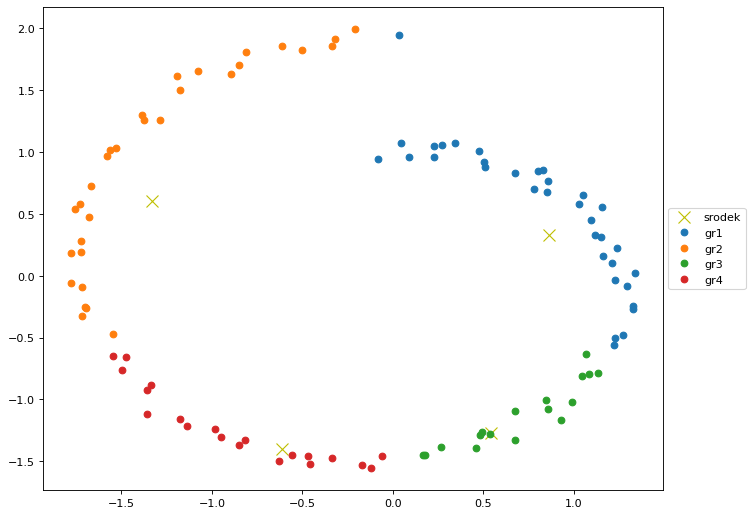

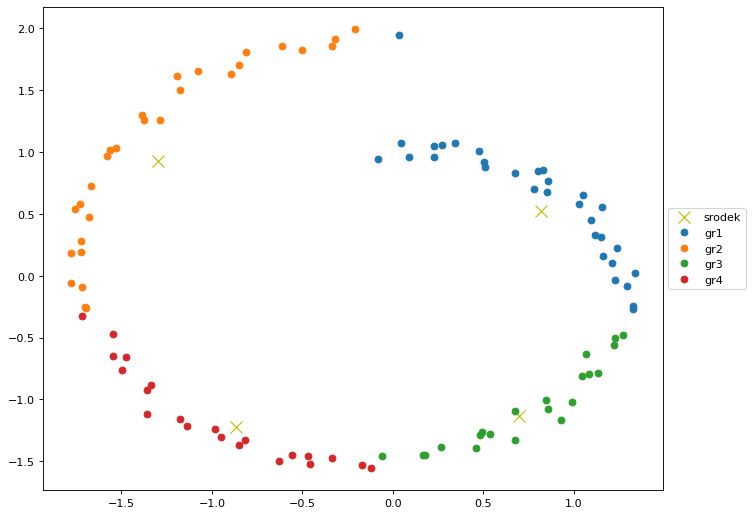

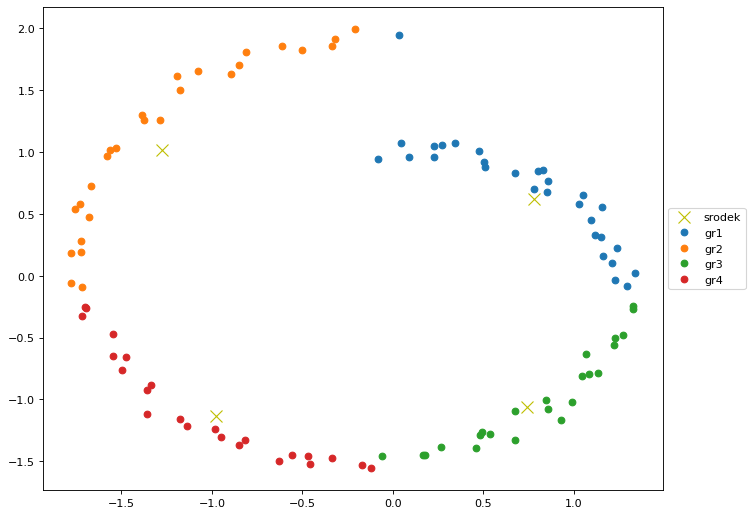

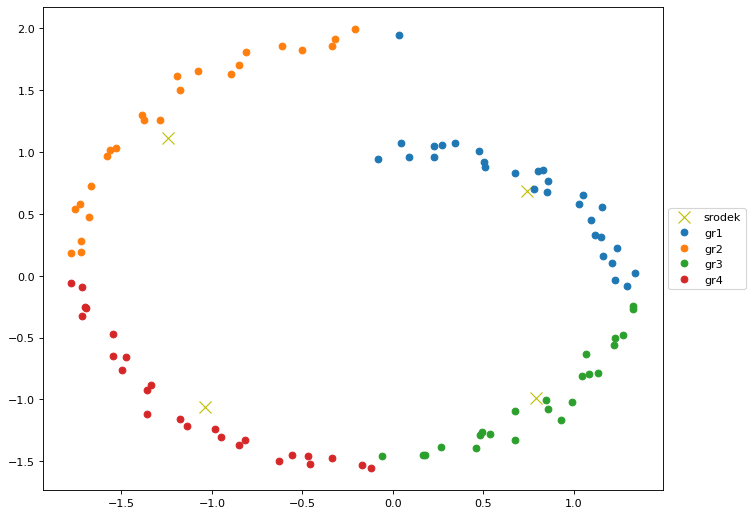

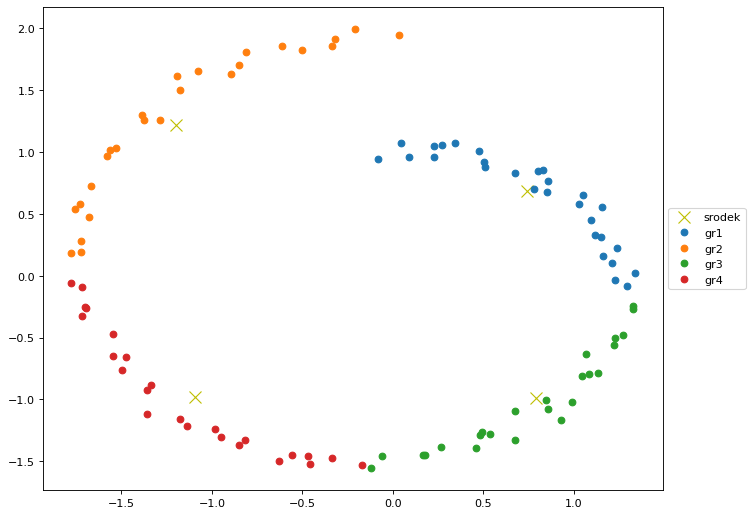

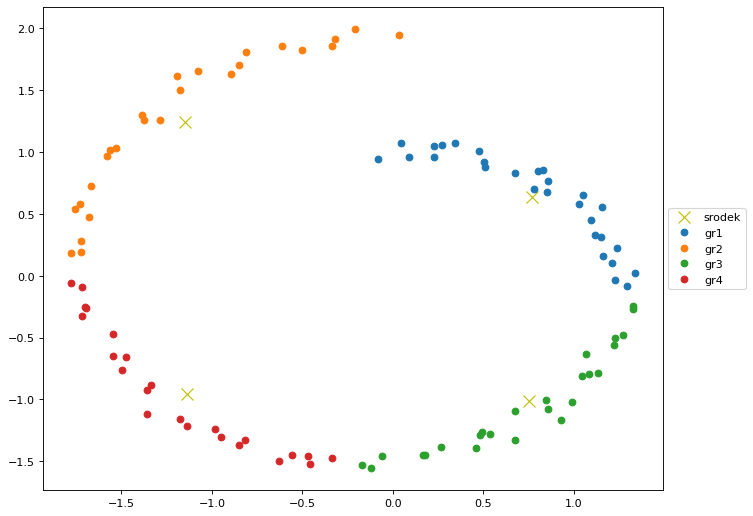

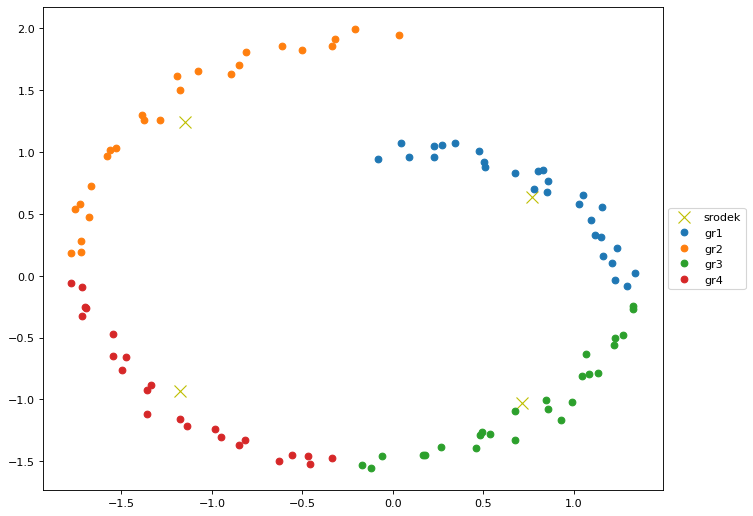

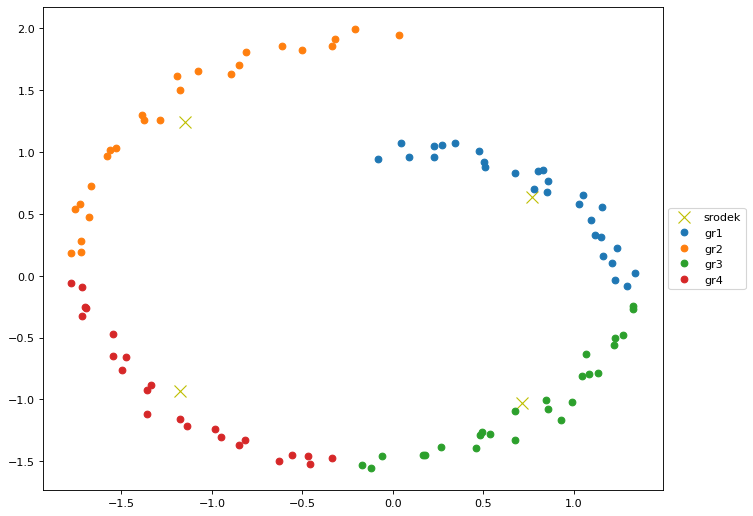

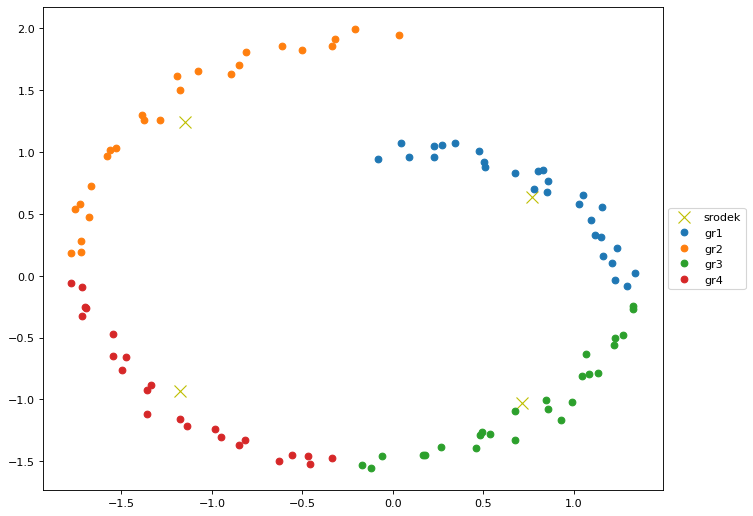

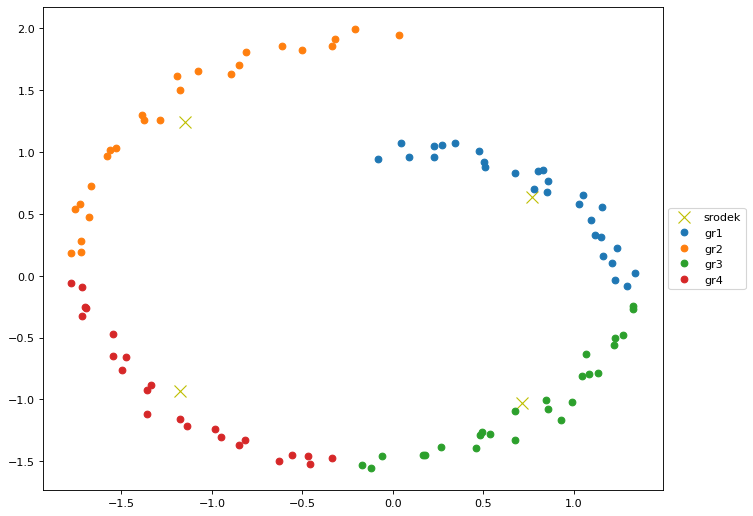

In [26]:
n_loop = 10

for x in range(n_loop):
    for k, v in slownik.items():
        punkty_srodek.append(srodek(v))
        slownik[k] = []
    fig = plt.figure(dpi=80, figsize=((10, 8)))
    slownik = licz_odleglosci(probki_num, punkty_srodek, slownik)

    plt.plot([x[0] for x in punkty_srodek], [x[1] for x in punkty_srodek], 'yx', label='srodek', markersize=10)
    for k, v in slownik.items():
        plt.plot([x1[0] for x1 in v], [y[1] for y in v], 'o', label=k)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    punkty_srodek = []